In [14]:
import pandas as pd

In [15]:
# Load the datasets
file_path = 'Industry_valueadded_WB.csv'  
industry_worker = pd.read_csv(file_path, delimiter=";")


In [16]:
industry_worker.head()

,Country Name,Country Code,Indicator Name,2000,2001,2002,2003,2004,2005,2006,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Industry (including construction), value added...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Industry (including construction), value added...",7965.377501,7770.206511,8630.730078,8597.200434,8738.838137,9150.088126,9549.634757,...,10193.223062,10048.099117,10069.510856,10023.175737,10031.441004,10023.657978,9428.574886,9594.289078,9309.202872,NaN
2,Afghanistan,AFG,"Industry (including construction), value added...",NaN,NaN,3426.585715,3361.049761,3665.843265,3743.611956,3895.170277,...,2415.813784,2602.193510,2716.481470,3096.027188,3419.207709,3575.066704,3429.378853,2897.879737,3019.759559,NaN
3,Africa Western and Central,AFW,"Industry (including construction), value added...",12153.989328,12231.262149,11856.477225,12423.893447,12333.249889,12392.648920,11776.371041,...,11096.617537,10439.884343,9645.426858,9547.934172,9439.807729,9414.433049,8764.336383,8423.587899,7912.376068,NaN
4,Angola,AGO,"Industry (including construction), value added...",NaN,NaN,30115.714551,28779.564547,31133.450749,36771.071636,41385.019362,...,46005.691365,50105.783135,50425.081942,48732.154934,45397.902002,43237.268294,41244.234981,39001.395647,38574.595800,NaN


In [17]:
import pandas as pd

industry_worker['industry, value added per worker'] = industry_worker.loc[:, '2000':'2023'].apply(lambda row: row.dropna().iloc[-1] if not row.dropna().empty else None, axis=1)

industry_worker = industry_worker.drop(columns=[str(year) for year in range(2000, 2024)])

industry_worker.head()


,Country Name,Country Code,Indicator Name,"industry, value added per worker"
0,Aruba,ABW,"Industry (including construction), value added...",NaN
1,Africa Eastern and Southern,AFE,"Industry (including construction), value added...",9309.202872
2,Afghanistan,AFG,"Industry (including construction), value added...",3019.759559
3,Africa Western and Central,AFW,"Industry (including construction), value added...",7912.376068
4,Angola,AGO,"Industry (including construction), value added...",38574.595800


In [18]:

industry_worker = industry_worker.drop(columns=['Indicator Name'])

# Save the DataFrame to a CSV file
industry_worker.to_csv('industry_worker_updated.csv', index=False)

industry_worker.head()


,Country Name,Country Code,"industry, value added per worker"
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,9309.202872
2,Afghanistan,AFG,3019.759559
3,Africa Western and Central,AFW,7912.376068
4,Angola,AGO,38574.595800


In [19]:
digital_adoption_index = pd.read_excel("Digital_Adoption_Index.xlsx")
digital_adoption_index.head()

,country,Year,Digital Adoption Index,DAI Business Sub-index,DAI People Sub-index,DAI Government Sub-index
0,Afghanistan,2014,0.302608,0.296788,0.087707,0.523330
1,Afghanistan,2016,0.343214,0.341886,0.123343,0.564413
2,Albania,2014,0.543884,0.554248,0.387060,0.690344
3,Albania,2016,0.607904,0.621125,0.463779,0.738807
4,Algeria,2014,0.369554,0.449673,0.279038,0.379950


In [21]:
# Ensure 'Year' column is an integer type if not already
digital_adoption_index['Year'] = digital_adoption_index['Year'].astype(int)

# Keep only the row with the latest year for each country
latest_data = digital_adoption_index.loc[digital_adoption_index.groupby('country')['Year'].idxmax()]

# Reset the index for a cleaner DataFrame
latest_data = latest_data.reset_index(drop=True)

# Display the result
latest_data.head()


,country,Year,Digital Adoption Index,DAI Business Sub-index,DAI People Sub-index,DAI Government Sub-index
0,Afghanistan,2016,0.343214,0.341886,0.123343,0.564413
1,Albania,2016,0.607904,0.621125,0.463779,0.738807
2,Algeria,2016,0.431103,0.498178,0.419688,0.375444
3,Andorra,2016,0.640383,0.829273,0.739461,0.352417
4,Angola,2016,0.334767,0.408602,0.131608,0.464091


In [22]:
# Drop the last three sub-index columns and the 'Year' column
latest_data = latest_data.drop(columns=['DAI Business Sub-index', 'DAI People Sub-index', 'DAI Government Sub-index', 'Year'])

# Save the DataFrame to a CSV file
latest_data.to_csv('digital_adoption_index_latest.csv', index=False)

# Display the first few rows to confirm
latest_data.head()


,country,Digital Adoption Index
0,Afghanistan,0.343214
1,Albania,0.607904
2,Algeria,0.431103
3,Andorra,0.640383
4,Angola,0.334767


In [23]:
# Load your datasets
digital_adoption = pd.read_csv("digital_adoption_index_latest.csv")
industry_worker = pd.read_csv("industry_worker_updated.csv")

# Extract unique country names from each dataset
digital_adoption_countries = set(digital_adoption['country'])
industry_worker_countries = set(industry_worker['Country Name'])

# Identify mismatches
countries_in_digital_not_in_industry = digital_adoption_countries - industry_worker_countries
countries_in_industry_not_in_digital = industry_worker_countries - digital_adoption_countries

print("Countries in Digital Adoption but not in Industry Worker:", countries_in_digital_not_in_industry)
print("Countries in Industry Worker but not in Digital Adoption:", countries_in_industry_not_in_digital)


Countries in Digital Adoption but not in Industry Worker: {'Yemen, Rep.', 'Iran, Islamic Rep.', 'Macao SAR, China', 'Swaziland', 'Czech Republic', 'Bahamas, The', 'Gambia, The', 'Egypt, Arab Rep.', 'Hong Kong SAR, China', 'Congo, Rep.', 'Venezuela, RB', 'Congo, Dem. Rep.', 'Turkey', 'Macedonia, FYR', 'Korea, Rep.', 'Vietnam'}
Countries in Industry Worker but not in Digital Adoption: {'Virgin Islands (U.S.)', 'IDA blend', 'IDA total', 'Yemen', 'Korea', 'Low & middle income', 'Palau', 'Guam', 'Upper middle income', 'Congo', 'Somalia', 'Central Europe and the Baltics', 'North America', 'Pacific island small states', 'Macao SAR', 'British Virgin Islands', 'OECD members', 'Latin America & Caribbean (excluding high income)', 'Lower middle income', 'Eritrea', 'Heavily indebted poor countries (HIPC)', 'Europe & Central Asia (excluding high income)', 'French Polynesia', 'Post-demographic dividend', 'South Asia', 'Late-demographic dividend', "Cote d'Ivoire", 'Africa Eastern and Southern', 'Baham

In [24]:
# Mapping for country names to standardize across datasets
country_name_mapping = {
    "Yemen, Rep.": "Yemen",
    "Iran, Islamic Rep.": "Iran",
    "Macao SAR, China": "Macao SAR",
    "Swaziland": "Eswatini",
    "Czech Republic": "Czechia",
    "Bahamas, The": "Bahamas",
    "Gambia, The": "Gambia",
    "Egypt, Arab Rep.": "Egypt",
    "Hong Kong SAR, China": "Hong Kong SAR",
    "Congo, Rep.": "Congo",
    "Venezuela, RB": "Venezuela",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Turkey": "Turkiye",
    "Macedonia, FYR": "North Macedonia",
    "Korea, Rep.": "Korea",
    "Vietnam": "Viet Nam"
}

# Apply the mappings to standardize country names
digital_adoption['country'] = digital_adoption['country'].replace(country_name_mapping)
industry_worker['Country Name'] = industry_worker['Country Name'].replace(country_name_mapping)


In [25]:
# Filter out non-country entries in the industry_worker dataset
exclude_terms = [
    'income', 'small states', 'OECD members', 'Euro area', 'World', 'fragile',
    'IDA', 'IBRD', 'East Asia & Pacific', 'Latin America', 'Middle East', 
    'Sub-Saharan Africa', 'European Union', 'Arab World'
]
industry_worker = industry_worker[~industry_worker['Country Name'].str.contains('|'.join(exclude_terms), case=False)]


In [26]:
# Check for remaining mismatches
digital_adoption_countries = set(digital_adoption['country'])
industry_worker_countries = set(industry_worker['Country Name'])

remaining_digital_not_in_industry = digital_adoption_countries - industry_worker_countries
remaining_industry_not_in_digital = industry_worker_countries - digital_adoption_countries

print("Remaining countries in Digital Adoption but not in Industry Worker:", remaining_digital_not_in_industry)
print("Remaining countries in Industry Worker but not in Digital Adoption:", remaining_industry_not_in_digital)


Remaining countries in Digital Adoption but not in Industry Worker: {'Trinidad and Tobago', 'Democratic Republic of the Congo'}
Remaining countries in Industry Worker but not in Digital Adoption: {'Late-demographic dividend', 'Virgin Islands (U.S.)', 'Turks and Caicos Islands', "Cote d'Ivoire", 'Not classified', 'Europe & Central Asia', 'Africa Eastern and Southern', 'Channel Islands', 'Sint Maarten (Dutch part)', 'Bermuda', 'Least developed countries: UN classification', 'Kosovo', 'Curacao', 'Palau', 'Gibraltar', 'South Sudan', 'Guam', 'Libya', 'Cayman Islands', 'Faroe Islands', 'Somalia', 'New Caledonia', 'Liechtenstein', 'Central Europe and the Baltics', 'North America', 'Isle of Man', 'San Marino', 'American Samoa', 'Early-demographic dividend', 'Puerto Rico', 'St. Martin (French part)', 'Sao Tome and Principe', 'British Virgin Islands', 'Micronesia', 'Nauru', 'Greenland', 'Monaco', 'Eritrea', 'Heavily indebted poor countries (HIPC)', 'Northern Mariana Islands', 'French Polynesia',

In [28]:
from sklearn.preprocessing import MinMaxScaler


merged_data = pd.merge(digital_adoption, industry_worker, how='inner', left_on='country', right_on='Country Name')

In [29]:
merged_data

,country,Digital Adoption Index,Country Name,Country Code,"industry, value added per worker"
0,Afghanistan,0.343214,Afghanistan,AFG,3019.759559
1,Albania,0.607904,Albania,ALB,12618.750715
2,Algeria,0.431103,Algeria,DZA,20087.501724
3,Andorra,0.640383,Andorra,AND,NaN
4,Angola,0.334767,Angola,AGO,38574.595800
...,...,...,...,...,...
178,Viet Nam,0.521304,Viet Nam,VNM,7815.487505
179,West Bank and Gaza,NaN,West Bank and Gaza,PSE,7547.615523
180,Yemen,0.255398,Yemen,Rep.,17150.187374
181,Zambia,0.344405,Zambia,ZMB,12655.167982


In [30]:

# Standardize each variable (Digital Adoption Index and Industry Value Added per Worker)
merged_data['Digital Adoption Index (Standardized)'] = (merged_data['Digital Adoption Index'] - merged_data['Digital Adoption Index'].mean()) / merged_data['Digital Adoption Index'].std()
merged_data['Industry Value Added (Standardized)'] = (merged_data['industry, value added per worker'] - merged_data['industry, value added per worker'].mean()) / merged_data['industry, value added per worker'].std()

# Calculate the composite index as the average of the standardized values
merged_data['Automation Composite Index'] = merged_data[['Digital Adoption Index (Standardized)', 'Industry Value Added (Standardized)']].mean(axis=1)


In [31]:
merged_data

,country,Digital Adoption Index,Country Name,Country Code,"industry, value added per worker",Digital Adoption Index (Standardized),Industry Value Added (Standardized),Automation Composite Index
0,Afghanistan,0.343214,Afghanistan,AFG,3019.759559,-0.900297,-0.624210,-0.762253
1,Albania,0.607904,Albania,ALB,12618.750715,0.466295,-0.455331,0.005482
2,Algeria,0.431103,Algeria,DZA,20087.501724,-0.446525,-0.323930,-0.385228
3,Andorra,0.640383,Andorra,AND,NaN,0.633989,NaN,0.633989
4,Angola,0.334767,Angola,AGO,38574.595800,-0.943910,0.001321,-0.471294
...,...,...,...,...,...,...,...,...
178,Viet Nam,0.521304,Viet Nam,VNM,7815.487505,0.019179,-0.539837,-0.260329
179,West Bank and Gaza,NaN,West Bank and Gaza,PSE,7547.615523,NaN,-0.544549,-0.544549
180,Yemen,0.255398,Yemen,Rep.,17150.187374,-1.353693,-0.375607,-0.864650
181,Zambia,0.344405,Zambia,ZMB,12655.167982,-0.894147,-0.454690,-0.674418


In [32]:
from sklearn.preprocessing import MinMaxScaler

# Selecting only the necessary columns from merged data (Digital Adoption Index and Industry Value Added)
data_for_scaling = merged_data[['Digital Adoption Index', 'industry, value added per worker']]

# Applying Min-Max Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_scaling)

# Converting scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=['Scaled Digital Adoption Index', 'Scaled Industry Value Added'])

# Adding scaled data to the original merged_data DataFrame
merged_data['Scaled Digital Adoption Index'] = scaled_df['Scaled Digital Adoption Index']
merged_data['Scaled Industry Value Added'] = scaled_df['Scaled Industry Value Added']

# Calculating the composite index as an average of the scaled variables
merged_data['Automation Composite Index'] = merged_data[['Scaled Digital Adoption Index', 'Scaled Industry Value Added']].mean(axis=1)

merged_data

,country,Digital Adoption Index,Country Name,Country Code,"industry, value added per worker",Digital Adoption Index (Standardized),Industry Value Added (Standardized),Automation Composite Index,Scaled Digital Adoption Index,Scaled Industry Value Added
0,Afghanistan,0.343214,Afghanistan,AFG,3019.759559,-0.900297,-0.624210,0.137841,0.271060,0.004621
1,Albania,0.607904,Albania,ALB,12618.750715,0.466295,-0.455331,0.331142,0.636913,0.025371
2,Algeria,0.431103,Algeria,DZA,20087.501724,-0.446525,-0.323930,0.217028,0.392540,0.041516
3,Andorra,0.640383,Andorra,AND,NaN,0.633989,NaN,0.681806,0.681806,NaN
4,Angola,0.334767,Angola,AGO,38574.595800,-0.943910,0.001321,0.170431,0.259384,0.081478
...,...,...,...,...,...,...,...,...,...,...
178,Viet Nam,0.521304,Viet Nam,VNM,7815.487505,0.019179,-0.539837,0.266101,0.517214,0.014988
179,West Bank and Gaza,NaN,West Bank and Gaza,PSE,7547.615523,NaN,-0.544549,0.014409,NaN,0.014409
180,Yemen,0.255398,Yemen,Rep.,17150.187374,-1.353693,-0.375607,0.092423,0.149680,0.035166
181,Zambia,0.344405,Zambia,ZMB,12655.167982,-0.894147,-0.454690,0.149078,0.272706,0.025450


/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/3454458017.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Automation Composite Index", y="country", data=top_countries, palette="viridis")


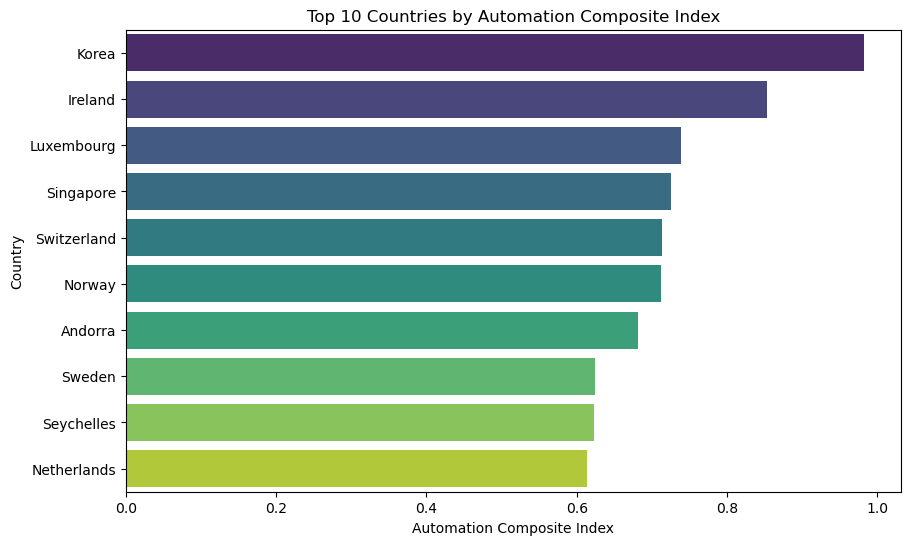

/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/3454458017.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Automation Composite Index", y="region", data=region_avg, palette="viridis")


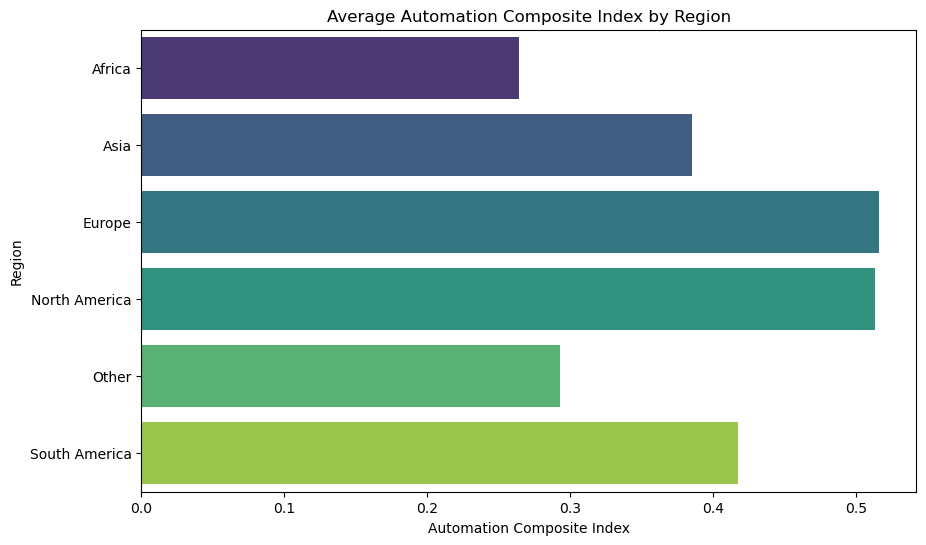

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the top countries by Automation Composite Index
top_countries = merged_data.sort_values(by="Automation Composite Index", ascending=False).head(10)

# Plotting the Automation Composite Index by Country
plt.figure(figsize=(10, 6))
sns.barplot(x="Automation Composite Index", y="country", data=top_countries, palette="viridis")
plt.title("Top 10 Countries by Automation Composite Index")
plt.xlabel("Automation Composite Index")
plt.ylabel("Country")
plt.show()

# Now, let's calculate the regional average Automation Composite Index
# Assuming `region` column exists or can be derived; I'll use a mock-up for now
# Here, let's just group by a mock region column (for illustrative purposes)

# Mock region assignment for illustrative purposes
# Normally, you'd have actual region data in your dataset
region_mapping = {
    "North America": ["United States", "Canada"],
    "Europe": ["Germany", "France", "United Kingdom", "Italy", "Spain"],
    "Asia": ["China", "India", "Japan", "South Korea"],
    "Africa": ["Nigeria", "South Africa", "Egypt", "Kenya"],
    "South America": ["Brazil", "Argentina", "Chile"],
}

# Adding a mock region column to merged_data
merged_data["region"] = merged_data["country"].apply(lambda x: next((k for k, v in region_mapping.items() if x in v), "Other"))

# Calculate average Automation Composite Index by region
region_avg = merged_data.groupby("region")["Automation Composite Index"].mean().reset_index()

# Plotting the Automation Composite Index by Region
plt.figure(figsize=(10, 6))
sns.barplot(x="Automation Composite Index", y="region", data=region_avg, palette="viridis")
plt.title("Average Automation Composite Index by Region")
plt.xlabel("Automation Composite Index")
plt.ylabel("Region")
plt.show()


/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/3613213299.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Automation Composite Index", y="country", data=top_10_automation, ax=axes[0], palette="viridis")
/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/3613213299.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Automation Composite Index", y="country", data=bottom_10_automation, ax=axes[1], palette="magma")


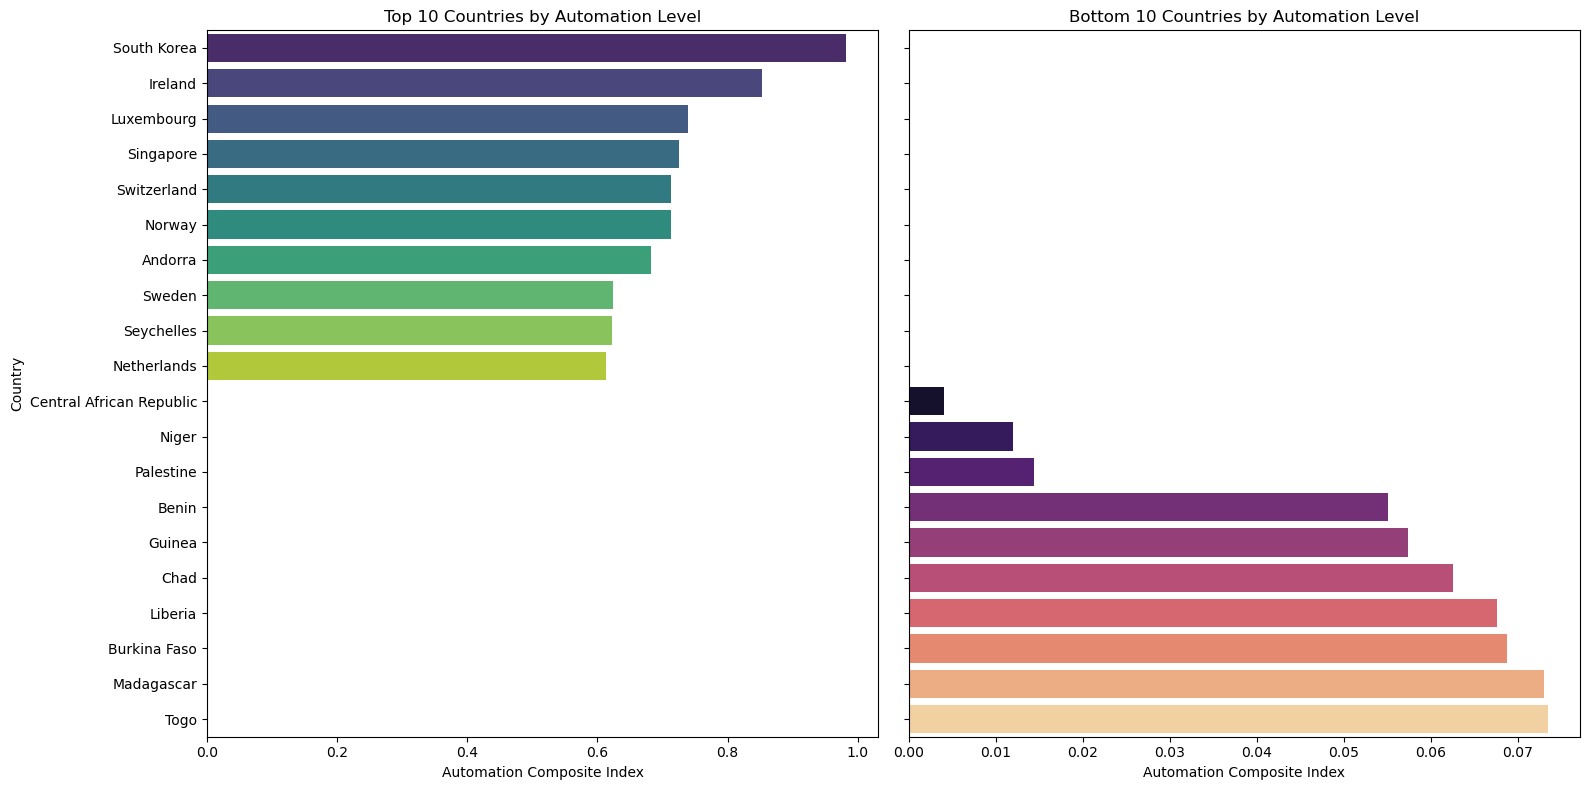

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort data for top 10 and bottom 10 countries by average automation proxy
top_10_automation = merged_data.nlargest(10, 'Automation Composite Index')
bottom_10_automation = merged_data.nsmallest(10, 'Automation Composite Index')

# Create side-by-side bar plots for top 10 and bottom 10 countries
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey=True)

# Plot for top 10 countries
sns.barplot(x="Automation Composite Index", y="country", data=top_10_automation, ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Countries by Automation Level")
axes[0].set_xlabel("Automation Composite Index")
axes[0].set_ylabel("Country")
axes[0].invert_yaxis()  # Highest values on top

# Plot for bottom 10 countries
sns.barplot(x="Automation Composite Index", y="country", data=bottom_10_automation, ax=axes[1], palette="magma")
axes[1].set_title("Bottom 10 Countries by Automation Level")
axes[1].set_xlabel("Automation Composite Index")
axes[1].set_ylabel("")  # Hide y-axis label for consistency

# Adjust layout and display plot
plt.tight_layout()
plt.show()


/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/3430570390.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Automation Composite Index", y="region", data=region_avg_filtered, palette="viridis")


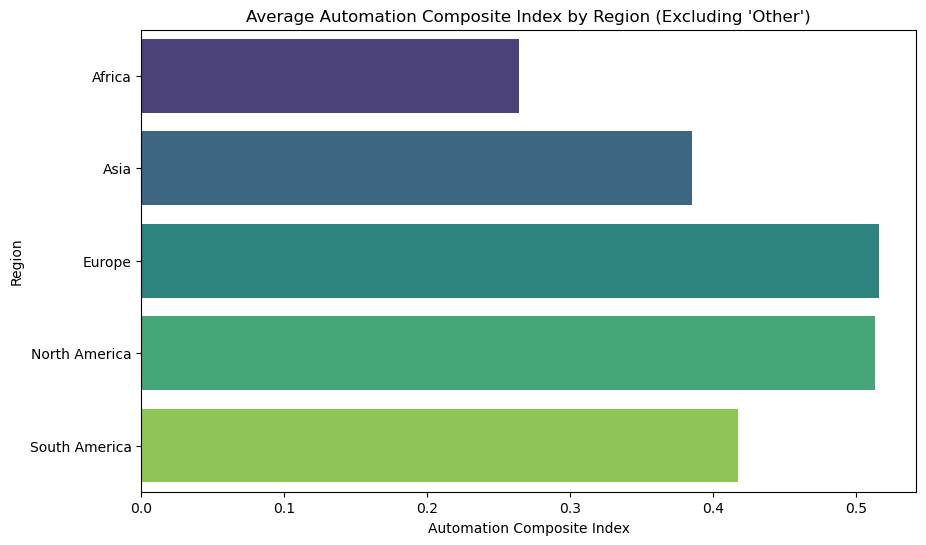

/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/3430570390.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Automation Composite Index", y="country", data=bottom_countries, palette="viridis")


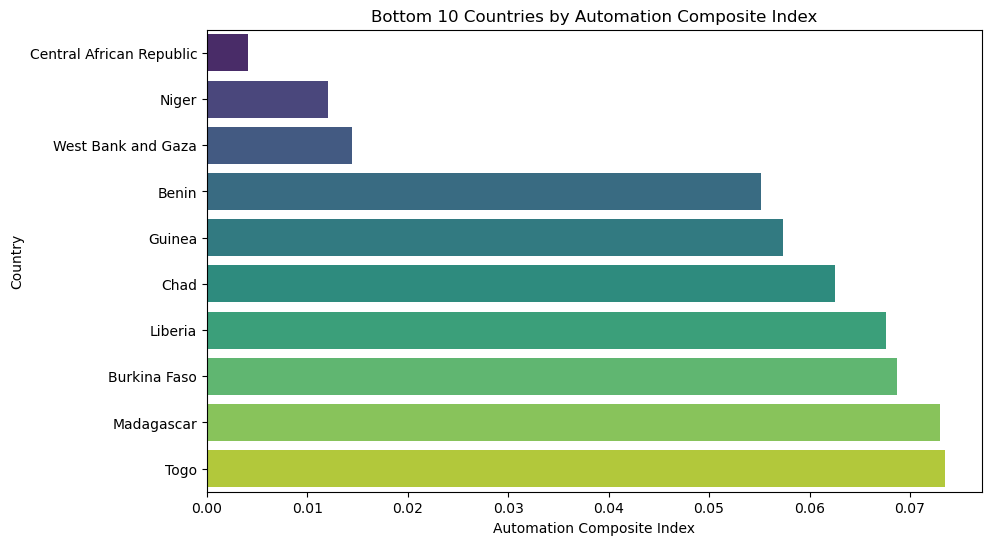

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the "Other" region from the region dataset
region_avg_filtered = region_avg[region_avg['region'] != 'Other']

# Plot the average automation composite index by region (excluding "Other")
plt.figure(figsize=(10, 6))
sns.barplot(x="Automation Composite Index", y="region", data=region_avg_filtered, palette="viridis")
plt.title("Average Automation Composite Index by Region (Excluding 'Other')")
plt.xlabel("Automation Composite Index")
plt.ylabel("Region")
plt.show()

# Sort merged_data by the composite index and select the bottom 10 countries
bottom_countries = merged_data.sort_values(by="Automation Composite Index").head(10)

# Plot the bottom 10 countries by automation composite index
plt.figure(figsize=(10, 6))
sns.barplot(x="Automation Composite Index", y="country", data=bottom_countries, palette="viridis")
plt.title("Bottom 10 Countries by Automation Composite Index")
plt.xlabel("Automation Composite Index")
plt.ylabel("Country")
plt.show()


/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/4055828348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Automation Composite Index", y="region", data=region_avg_filtered, palette="viridis")


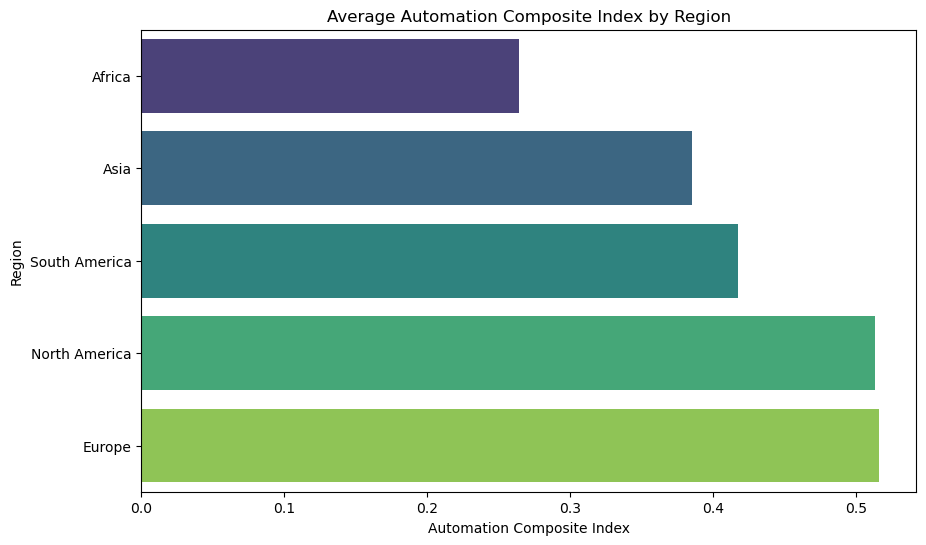

In [38]:
# Sort region_avg_filtered in ascending order of the automation composite index
region_avg_filtered = region_avg_filtered.sort_values(by="Automation Composite Index", ascending=True)

# Plot the average automation composite index by region (excluding "Other") in ascending order
plt.figure(figsize=(10, 6))
sns.barplot(x="Automation Composite Index", y="region", data=region_avg_filtered, palette="viridis")
plt.title("Average Automation Composite Index by Region")
plt.xlabel("Automation Composite Index")
plt.ylabel("Region")
plt.show()


In [39]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the downloaded world shapefile (adjust the path to where you saved the shapefile)
world = gpd.read_file("/Users/nancybaraka/Documents/GitHub/Final-Project/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [41]:
# Check unique country names in automation_data
automation_countries = set(merged_data['country'].unique())

# Check unique country names in world GeoDataFrame
world_countries = set(world['ADMIN'].unique())

# Find mismatches
countries_in_automation_not_in_world = automation_countries - world_countries
countries_in_world_not_in_automation = world_countries - automation_countries

print("Countries in Automation Data but not in World DataFrame:", countries_in_automation_not_in_world)
print("Countries in World DataFrame but not in Automation Data:", countries_in_world_not_in_automation)

Countries in Automation Data but not in World DataFrame: {'St. Vincent and the Grenadines', 'Antigua and Barbuda', 'Maldives', 'Bahamas', 'Samoa', 'Syrian Arab Republic', 'Dominica', 'St. Kitts and Nevis', 'Bahrain', 'Andorra', 'Russian Federation', 'Korea', 'Hong Kong SAR', 'Cabo Verde', 'Viet Nam', 'Singapore', 'United States', 'Tonga', 'Barbados', 'Congo', 'Kiribati', 'Malta', 'Marshall Islands', 'Lao PDR', 'Tanzania', 'Mauritius', 'Serbia', 'St. Lucia', 'Turkiye', 'Comoros', 'West Bank and Gaza', 'Macao SAR', 'Brunei Darussalam', 'Slovak Republic', 'Grenada', 'Seychelles', 'Timor-Leste', 'Tuvalu', 'Kyrgyz Republic', 'Eswatini'}
Countries in World DataFrame but not in Automation Data: {'eSwatini', 'Brunei', 'Syria', 'Laos', 'French Southern and Antarctic Lands', 'Turkey', 'Republic of Serbia', 'Kosovo', 'Slovakia', 'East Timor', 'Falkland Islands', 'Northern Cyprus', 'Antarctica', 'Libya', 'Vietnam', 'Somalia', 'Trinidad and Tobago', 'New Caledonia', 'Kyrgyzstan', 'Western Sahara', 

In [42]:
# Define a mapping dictionary to standardize country names
country_name_mapping = {
    'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines',
    'Antigua and Barbuda': 'Antigua and Barbuda',
    'Maldives': 'Maldives',
    'Bahamas': 'The Bahamas',
    'Samoa': 'Samoa',
    'Syrian Arab Republic': 'Syria',
    'Dominica': 'Dominica',
    'St. Kitts and Nevis': 'Saint Kitts and Nevis',
    'Bahrain': 'Bahrain',
    'Andorra': 'Andorra',
    'Russian Federation': 'Russia',
    'Korea': 'South Korea',
    'Hong Kong SAR': 'Hong Kong',
    'Cabo Verde': 'Cape Verde',
    'Viet Nam': 'Vietnam',
    'Singapore': 'Singapore',
    'United States': 'United States of America',
    'Tonga': 'Tonga',
    'Barbados': 'Barbados',
    'Congo': 'Republic of the Congo',
    'Kiribati': 'Kiribati',
    'Malta': 'Malta',
    'Marshall Islands': 'Marshall Islands',
    'Lao PDR': 'Laos',
    'Tanzania': 'United Republic of Tanzania',
    'Mauritius': 'Mauritius',
    'Serbia': 'Republic of Serbia',
    'St. Lucia': 'Saint Lucia',
    'Turkiye': 'Turkey',
    'Comoros': 'Comoros',
    'West Bank and Gaza': 'Palestine',
    'Macao SAR': 'Macau',
    'Brunei Darussalam': 'Brunei',
    'Slovak Republic': 'Slovakia',
    'Grenada': 'Grenada',
    'Seychelles': 'Seychelles',
    'Timor-Leste': 'East Timor',
    'Tuvalu': 'Tuvalu',
    'Kyrgyz Republic': 'Kyrgyzstan',
    'Eswatini': 'eSwatini',
}


In [43]:
# Apply the mapping to `merged_data`
merged_data['country'] = merged_data['country'].replace(country_name_mapping)


In [44]:
# Re-run the mismatch check
automation_countries = set(merged_data['country'].unique())
world_countries = set(world['ADMIN'].unique())

countries_in_automation_not_in_world = automation_countries - world_countries
countries_in_world_not_in_automation = world_countries - automation_countries

print("Countries in Automation Data but not in World DataFrame:", countries_in_automation_not_in_world)
print("Countries in World DataFrame but not in Automation Data:", countries_in_world_not_in_automation)


Countries in Automation Data but not in World DataFrame: {'Antigua and Barbuda', 'Maldives', 'Samoa', 'Dominica', 'Andorra', 'Bahrain', 'Cape Verde', 'Singapore', 'Saint Kitts and Nevis', 'Saint Lucia', 'Tonga', 'Hong Kong', 'Barbados', 'Kiribati', 'Malta', 'Marshall Islands', 'Macau', 'Mauritius', 'Comoros', 'Grenada', 'Seychelles', 'Tuvalu', 'Saint Vincent and the Grenadines'}
Countries in World DataFrame but not in Automation Data: {'French Southern and Antarctic Lands', 'Kosovo', 'Falkland Islands', 'Northern Cyprus', 'Antarctica', 'Libya', 'Somalia', 'Trinidad and Tobago', 'New Caledonia', 'Western Sahara', 'North Korea', 'Democratic Republic of the Congo', 'Puerto Rico', 'Greenland', 'Eritrea', 'Taiwan', 'Ivory Coast', 'South Sudan', 'Somaliland'}


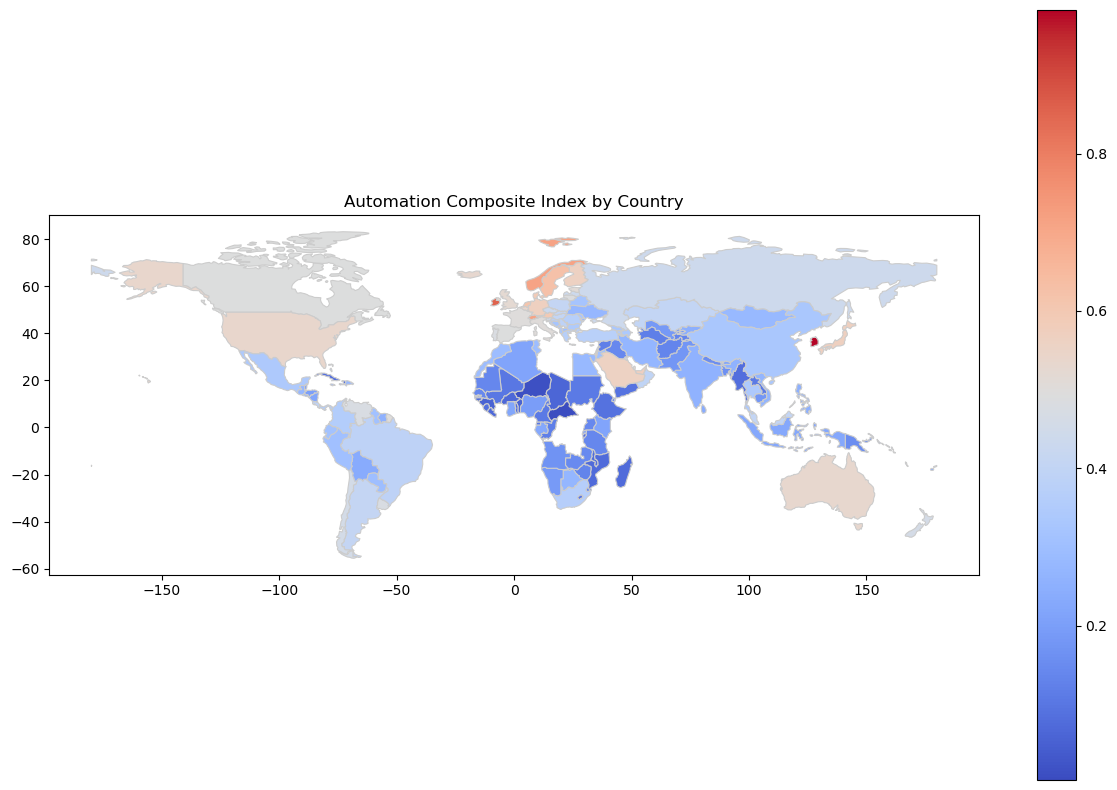

In [54]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the shapefile directly from its file path
# Replace this path with the correct file path for your shapefile
world = gpd.read_file('/Users/nancybaraka/Documents/GitHub/Final-Project/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

# Assuming 'merged_data' contains the automation composite index and is already mapped to match 'world' countries
# Merge the world map with 'merged_data' based on standardized country names
world_automation = world.merge(merged_data, left_on="ADMIN", right_on="country", how="left")

# Plotting the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world_automation.plot(column='Automation Composite Index', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title("Automation Composite Index by Country")
plt.show()


In [49]:
merged_data.to_csv('automation_index_final.csv', index=False)


In [55]:
automation_potential = pd.read_csv("/Users/nancybaraka/Documents/GitHub/Final-Project/potential_automation.csv")
automation_potential

,country,year,A. Agriculture; forestry and fishing (%),B. Mining and quarrying (%),C. Manufacturing (%),F. Construction (%),G. Wholesale and retail trade; repair of motor vehicles and motorcycles (%),H. Transportation and storage (%),I. Accommodation and food service activities (%),J. Information and communication (%),...,N. Administrative and support service activities (%),O. Public administration and defence; compulsory social security (%),P. Education (%),Q. Human health and social work activities (%),"R. Arts, entertainment and recreation (%)",S. Other service activities (%),T. Activities of households as employers; undifferentiated goods- and services-producing activities of households for own use (%),U. Activities of extraterritorial organizations and bodies (%),X. Not elsewhere classified (%),Automation Potential (%)
0,Afghanistan,2021,48.975194,0.401046,6.422531,11.963403,11.781341,5.249364,0.627871,0.251684,...,0.565816,5.699669,3.460950,0.889658,NaN,0.547388,NaN,0.125653,2.870419,55.662943
1,Albania,2019,36.995596,0.603027,11.123990,7.154631,12.045360,3.069679,5.876924,1.099056,...,3.085985,5.619792,4.739631,3.006219,0.718700,1.861777,0.533061,0.058479,NaN,53.758939
2,Angola,2021,56.069617,0.622098,2.074646,2.637306,18.350566,3.130705,0.625902,0.383793,...,1.561105,5.002828,3.069287,0.986401,0.059068,0.954133,2.532543,NaN,1.501016,52.560580
3,Argentina,2023,9.826111,6.548851,4.166206,8.621926,4.198637,40.513152,19.828089,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.297027,52.497483
4,Armenia,2021,29.006702,1.193293,8.420391,7.006814,12.457544,4.001047,2.913894,1.616375,...,0.557758,8.728198,10.622538,4.425260,1.890077,3.502102,0.247167,0.188877,0.197925,48.924118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Uzbekistan,2020,17.007710,1.684722,10.644875,1.060563,8.957292,8.418134,2.692796,2.089502,...,2.733827,7.236387,16.118266,8.770516,0.753645,3.024177,1.340561,0.088140,0.720808,44.222532
133,Vanuatu,2020,41.852309,0.094316,4.011743,5.126264,6.267352,3.756692,3.267844,0.830245,...,2.679366,2.826818,5.624411,1.968677,0.852827,5.047889,5.265745,1.030832,7.089627,44.716123
134,Vietnam,2023,25.283935,0.311784,21.846189,8.651660,14.192707,3.693381,5.350846,0.620956,...,0.760726,2.355392,3.572230,1.143673,0.533994,2.138574,0.387352,0.007159,6.846965,54.213219
135,Zambia,2023,56.175342,1.337258,4.959473,3.309423,14.209900,2.854094,1.523918,0.288652,...,2.507127,1.192717,3.531416,1.570059,0.194780,1.918585,2.720317,NaN,NaN,53.913299


In [57]:
# Keep only the 'Country' and 'Automation Potential (%)' columns
automation_potential = automation_potential[['country', 'Automation Potential (%)']]

# Display the first few rows of the modified DataFrame to confirm
automation_potential.head()


,country,Automation Potential (%)
0,Afghanistan,55.662943
1,Albania,53.758939
2,Angola,52.560580
3,Argentina,52.497483
4,Armenia,48.924118


In [62]:
# Identify country mismatches between automation_potential and final_merged_data
automation_countries = set(automation_potential['country'].unique())
merged_data_countries = set(merged_data['country'].unique())

# Find mismatches
mismatches_automation_vs_merged = automation_countries - merged_data_countries
mismatches_merged_vs_automation = merged_data_countries - automation_countries

mismatches_automation_vs_merged, mismatches_merged_vs_automation


({'Democratic Republic of the Congo',
  'Ivory Coast',
  'Kosovo',
  'Somalia',
  'Trinidad and Tobago'},
 {'Algeria',
  'Andorra',
  'Antigua and Barbuda',
  'Azerbaijan',
  'Bahrain',
  'Barbados',
  'Canada',
  'Cape Verde',
  'Central African Republic',
  'China',
  'Comoros',
  'Cuba',
  'Djibouti',
  'Dominica',
  'Equatorial Guinea',
  'Gabon',
  'Grenada',
  'Guinea',
  'Hong Kong',
  'Kazakhstan',
  'Kiribati',
  'Kuwait',
  'Macau',
  'Malawi',
  'Maldives',
  'Malta',
  'Marshall Islands',
  'Mauritius',
  'New Zealand',
  'Nicaragua',
  'Oman',
  'Palestine',
  'Paraguay',
  'Qatar',
  'Saint Kitts and Nevis',
  'Saint Lucia',
  'Saint Vincent and the Grenadines',
  'Samoa',
  'Saudi Arabia',
  'Seychelles',
  'Singapore',
  'South Africa',
  'Syria',
  'Tonga',
  'Turkmenistan',
  'Tuvalu',
  'Venezuela',
  'Yemen',
  'eSwatini'})

In [61]:
merged_data

,country,Digital Adoption Index,Country Name,Country Code,"industry, value added per worker",Digital Adoption Index (Standardized),Industry Value Added (Standardized),Automation Composite Index,Scaled Digital Adoption Index,Scaled Industry Value Added,region
0,Afghanistan,0.343214,Afghanistan,AFG,3019.759559,-0.900297,-0.624210,0.137841,0.271060,0.004621,Other
1,Albania,0.607904,Albania,ALB,12618.750715,0.466295,-0.455331,0.331142,0.636913,0.025371,Other
2,Algeria,0.431103,Algeria,DZA,20087.501724,-0.446525,-0.323930,0.217028,0.392540,0.041516,Other
3,Andorra,0.640383,Andorra,AND,NaN,0.633989,NaN,0.681806,0.681806,NaN,Other
4,Angola,0.334767,Angola,AGO,38574.595800,-0.943910,0.001321,0.170431,0.259384,0.081478,Other
...,...,...,...,...,...,...,...,...,...,...,...
178,Vietnam,0.521304,Viet Nam,VNM,7815.487505,0.019179,-0.539837,0.266101,0.517214,0.014988,Other
179,Palestine,NaN,West Bank and Gaza,PSE,7547.615523,NaN,-0.544549,0.014409,NaN,0.014409,Other
180,Yemen,0.255398,Yemen,Rep.,17150.187374,-1.353693,-0.375607,0.092423,0.149680,0.035166,Other
181,Zambia,0.344405,Zambia,ZMB,12655.167982,-0.894147,-0.454690,0.149078,0.272706,0.025450,Other


In [64]:
country_mapping = {
    'Democratic Republic of the Congo': 'Congo, Democratic Republic of the',
    'Ivory Coast': "Côte d'Ivoire",
    'Kosovo': 'Kosovo',
    'Somalia': 'Somalia',
    'Trinidad and Tobago': 'Trinidad and Tobago',
}

# Apply the mapping to the automation_potential DataFrame
automation_potential['country'] = automation_potential['country'].replace(country_mapping)

# Optional: Check for any remaining mismatches
automation_countries_updated = set(automation_potential['country'].unique())
remaining_mismatches = automation_countries_updated - merged_data_countries
print(remaining_mismatches)


{'Somalia', 'Trinidad and Tobago', 'Kosovo', 'Congo, Democratic Republic of the', "Côte d'Ivoire"}


/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/2013886814.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  automation_potential['country'] = automation_potential['country'].replace(country_mapping)


In [67]:
# Proceed to merge the updated automation_potential with final_merged_data
final_merged_data_updated = pd.merge(merged_data, automation_potential, on='country', how='inner')

# Display the resulting merged DataFrame
final_merged_data_updated.head()


,country,Digital Adoption Index,Country Name,Country Code,"industry, value added per worker",Digital Adoption Index (Standardized),Industry Value Added (Standardized),Automation Composite Index,Scaled Digital Adoption Index,Scaled Industry Value Added,region,Automation Potential (%)
0,Afghanistan,0.343214,Afghanistan,AFG,3019.759559,-0.900297,-0.624210,0.137841,0.271060,0.004621,Other,55.662943
1,Albania,0.607904,Albania,ALB,12618.750715,0.466295,-0.455331,0.331142,0.636913,0.025371,Other,53.758939
2,Angola,0.334767,Angola,AGO,38574.595800,-0.943910,0.001321,0.170431,0.259384,0.081478,Other,52.560580
3,Argentina,0.685676,Argentina,ARG,33911.361604,0.867835,-0.080721,0.407904,0.744410,0.071398,South America,52.497483
4,Armenia,0.621723,Armenia,ARM,21031.446102,0.537647,-0.307323,0.349785,0.656014,0.043556,Other,48.924118


In [ ]:
world_automatio

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,1,Republic of Serbia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,1,Montenegro,...,None,None,None,None,None,None,None,None,None,"POLYGON ((20.0707 42.58863, 19.80161 42.50009,..."
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Disputed,1,Kosovo,...,Admin-0 country,Unrecognized,Admin-0 country,Unrecognized,Admin-0 country,Admin-0 country,Admin-0 country,Admin-0 country,Unrecognized,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,1,Trinidad and Tobago,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-61.68 10.76, -61.105 10.89, -60.895..."


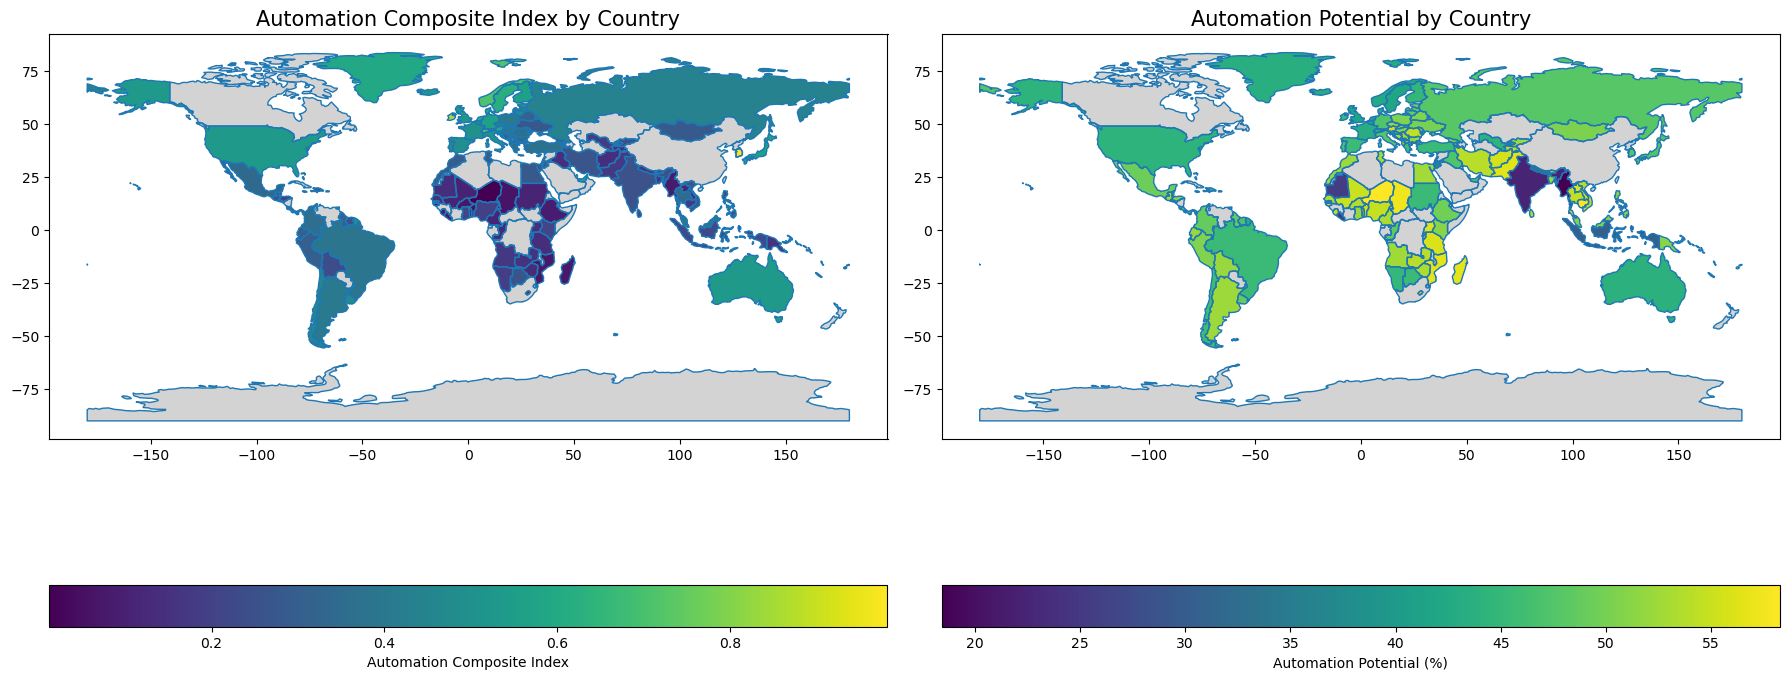

In [72]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Merge with final merged data for mapping
world = world.merge(final_merged_data_updated, how='left', left_on='SOVEREIGNT', right_on='country')

# Plotting the Automation Composite Index
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Automation Composite Index Map
world.boundary.plot(ax=ax[0], linewidth=1)
world.plot(column='Automation Composite Index', ax=ax[0], legend=True,
           legend_kwds={'label': "Automation Composite Index",
                        'orientation': "horizontal"},
           cmap='viridis', missing_kwds={'color': 'lightgrey'})
ax[0].set_title('Automation Composite Index by Country', fontsize=15)

# Automation Potential Map
world.boundary.plot(ax=ax[1], linewidth=1)
world.plot(column='Automation Potential (%)', ax=ax[1], legend=True,
           legend_kwds={'label': "Automation Potential (%)",
                        'orientation': "horizontal"},
           cmap='viridis', missing_kwds={'color': 'lightgrey'})
ax[1].set_title('Automation Potential by Country', fontsize=15)

plt.tight_layout()
plt.show()


/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/3107098491.py:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


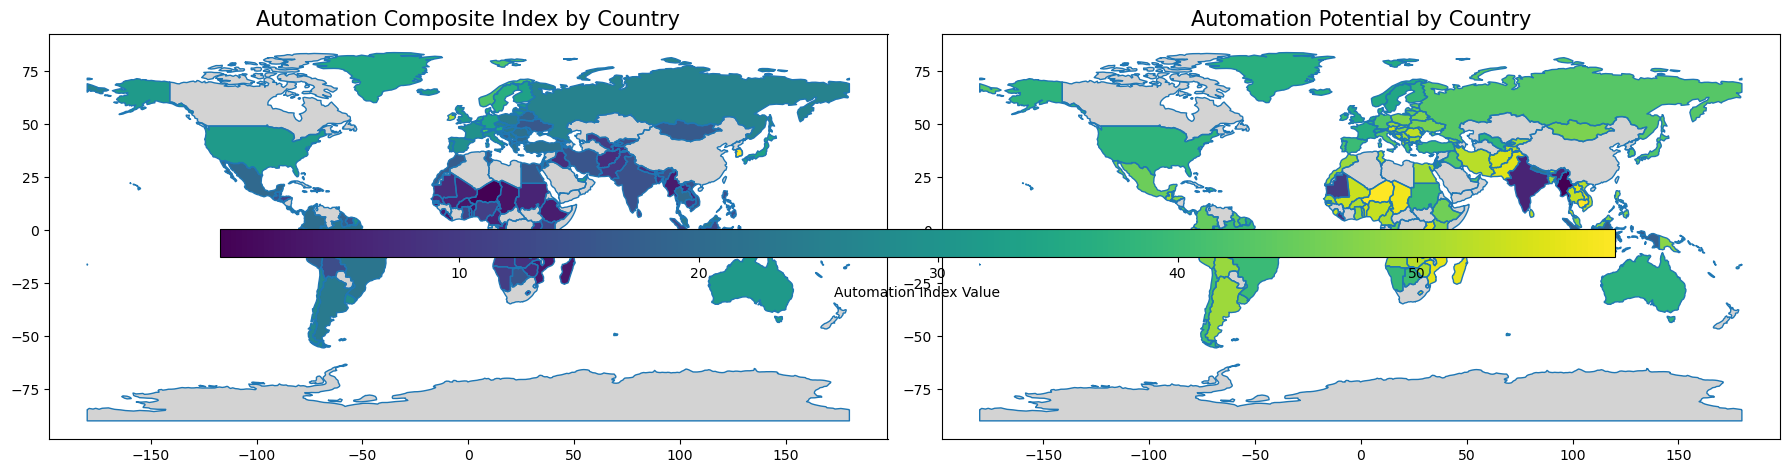

In [73]:

# Plotting the Automation Composite Index
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Automation Composite Index Map
world.boundary.plot(ax=ax[0], linewidth=1)
composite_index_map = world.plot(column='Automation Composite Index', ax=ax[0], legend=False,
           cmap='viridis', missing_kwds={'color': 'lightgrey'})
ax[0].set_title('Automation Composite Index by Country', fontsize=15)

# Automation Potential Map
world.boundary.plot(ax=ax[1], linewidth=1)
potential_map = world.plot(column='Automation Potential (%)', ax=ax[1], legend=False,
           cmap='viridis', missing_kwds={'color': 'lightgrey'})
ax[1].set_title('Automation Potential by Country', fontsize=15)

# Create a single legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(world['Automation Composite Index'].min(), world['Automation Potential (%)'].min()), vmax=max(world['Automation Composite Index'].max(), world['Automation Potential (%)'].max())))
sm.set_array([])  # only needed for older Matplotlib versions
fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=50, label='Automation Index Value')

plt.tight_layout()
plt.show()

/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/822034119.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


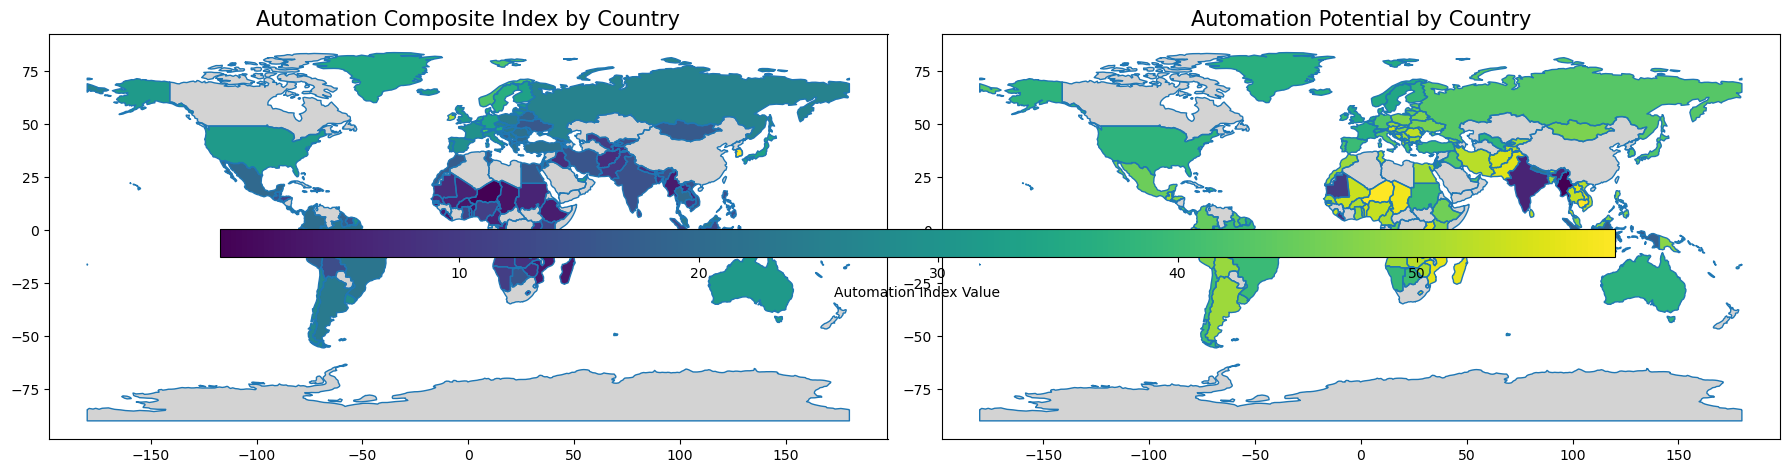

In [74]:
# Plotting the Automation Composite Index
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Automation Composite Index Map
world.boundary.plot(ax=ax[0], linewidth=1)
world.plot(column='Automation Composite Index', ax=ax[0], legend=False,
           cmap='viridis', missing_kwds={'color': 'lightgrey'})
ax[0].set_title('Automation Composite Index by Country', fontsize=15)

# Automation Potential Map
world.boundary.plot(ax=ax[1], linewidth=1)
world.plot(column='Automation Potential (%)', ax=ax[1], legend=False,
           cmap='viridis', missing_kwds={'color': 'lightgrey'})
ax[1].set_title('Automation Potential by Country', fontsize=15)

# Create a single legend below the maps
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(world['Automation Composite Index'].min(), world['Automation Potential (%)'].min()), vmax=max(world['Automation Composite Index'].max(), world['Automation Potential (%)'].max())))
sm.set_array([])  # only needed for older Matplotlib versions

# Create a colorbar below the maps
cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
cbar.set_label('Automation Index Value')

plt.tight_layout()
plt.show()


/var/folders/5j/rbw66y292j36gxy345r1m_sw0000gn/T/ipykernel_46023/3975929747.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


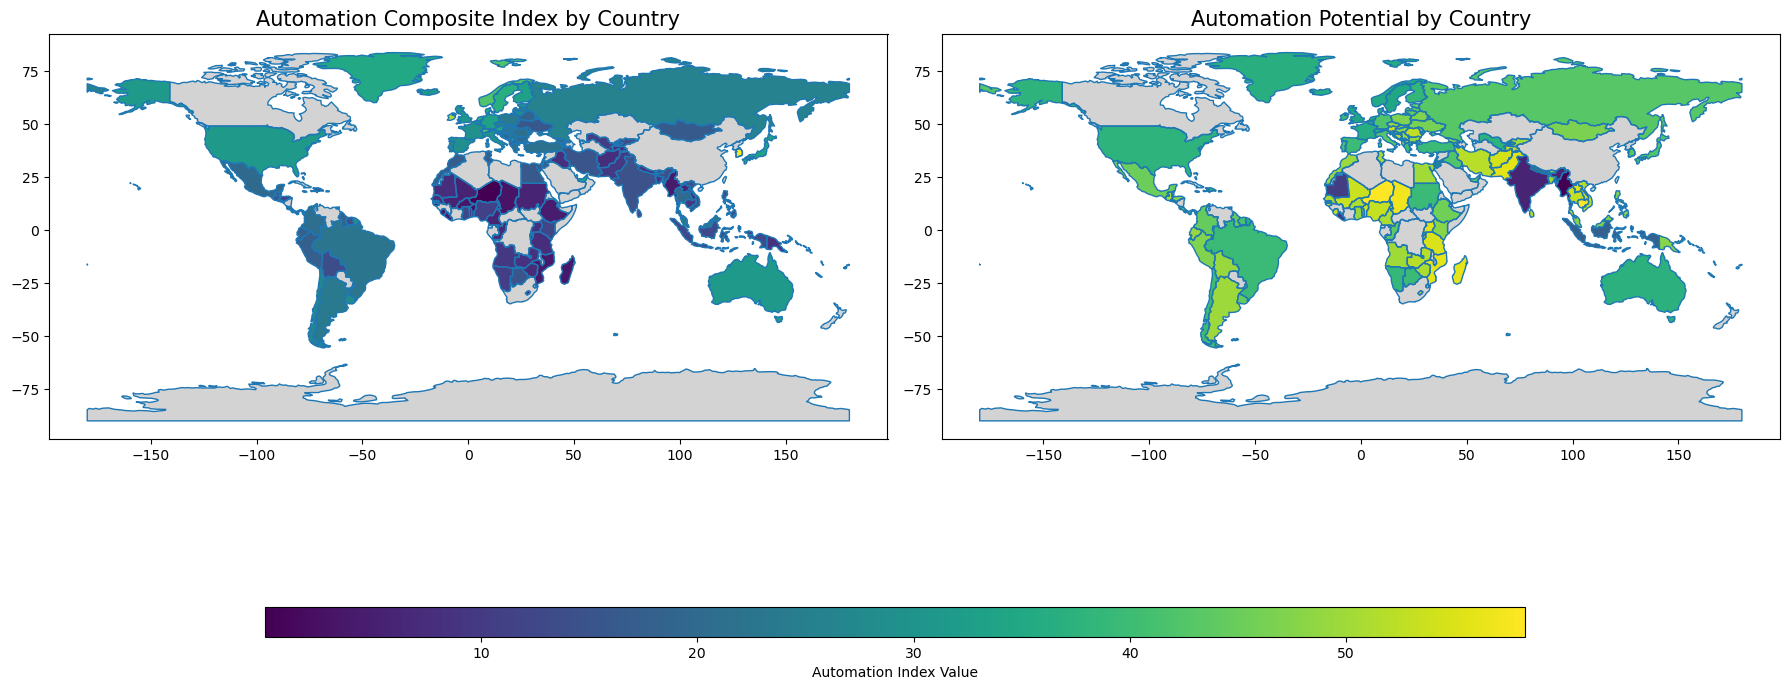

In [75]:

# Plotting the Automation Composite Index
fig, ax = plt.subplots(1, 2, figsize=(18, 10))

# Automation Composite Index Map
world.boundary.plot(ax=ax[0], linewidth=1)
world.plot(column='Automation Composite Index', ax=ax[0], legend=False,
           cmap='viridis', missing_kwds={'color': 'lightgrey'})
ax[0].set_title('Automation Composite Index by Country', fontsize=15)

# Automation Potential Map
world.boundary.plot(ax=ax[1], linewidth=1)
world.plot(column='Automation Potential (%)', ax=ax[1], legend=False,
           cmap='viridis', missing_kwds={'color': 'lightgrey'})
ax[1].set_title('Automation Potential by Country', fontsize=15)

# Create a colorbar below the maps
cbar_ax = fig.add_axes([0.15, 0.1, 0.7, 0.03])  # [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=min(world['Automation Composite Index'].min(), world['Automation Potential (%)'].min()), vmax=max(world['Automation Composite Index'].max(), world['Automation Potential (%)'].max())))
sm.set_array([])  # only needed for older Matplotlib versions
cbar = fig.colorbar(sm, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Automation Index Value')

plt.tight_layout()
plt.show()


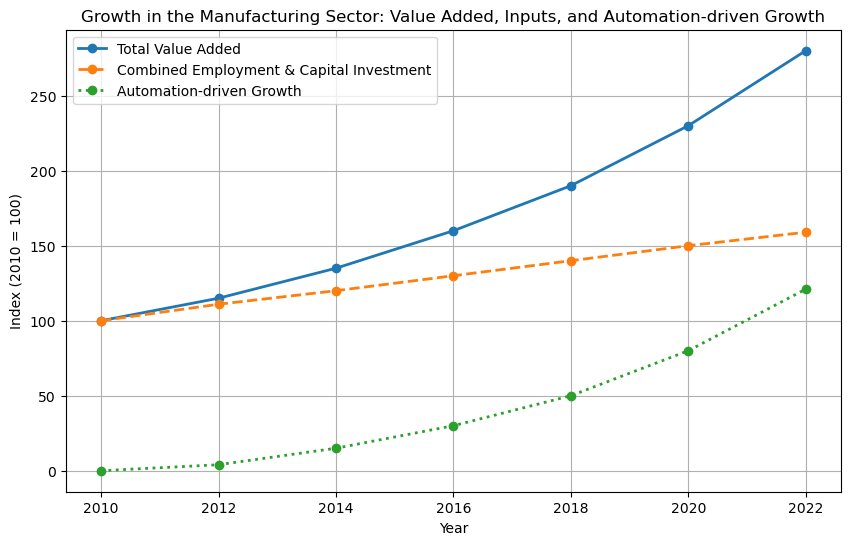

In [76]:
# Sample data representing the growth over time for the manufacturing sector
# Here, Value Added represents the total growth, while Employment and Capital Investment are inputs.

# Years for the time series
years = [2010, 2012, 2014, 2016, 2018, 2020, 2022]

# Sample data: Total value added, employment growth, and capital investment growth over time
# Assume these represent indexes (2010=100)
value_added = [100, 115, 135, 160, 190, 230, 280]  # Represents total growth in value added
employment = [100, 103, 105, 107, 110, 112, 114]  # Growth attributed to labor
capital_investment = [100, 108, 115, 123, 130, 138, 145]  # Growth attributed to capital

# Calculate combined growth of employment and capital investment
combined_employment_capital = [e + c - 100 for e, c in zip(employment, capital_investment)]  # Adjust for indexing at 100

# Calculate automation-driven growth as the difference between value added and combined inputs
automation_driven_growth = [va - ec for va, ec in zip(value_added, combined_employment_capital)]

# Create a DataFrame for easier plotting
data = pd.DataFrame({
    'Year': years,
    'Value Added': value_added,
    'Combined Employment & Capital': combined_employment_capital,
    'Automation-driven Growth': automation_driven_growth
})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Value Added'], label='Total Value Added', marker='o', linestyle='-', linewidth=2)
plt.plot(data['Year'], data['Combined Employment & Capital'], label='Combined Employment & Capital Investment', marker='o', linestyle='--', linewidth=2)
plt.plot(data['Year'], data['Automation-driven Growth'], label='Automation-driven Growth', marker='o', linestyle=':', linewidth=2)

# Adding titles and labels
plt.title('Growth in the Manufacturing Sector: Value Added, Inputs, and Automation-driven Growth')
plt.xlabel('Year')
plt.ylabel('Index (2010 = 100)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


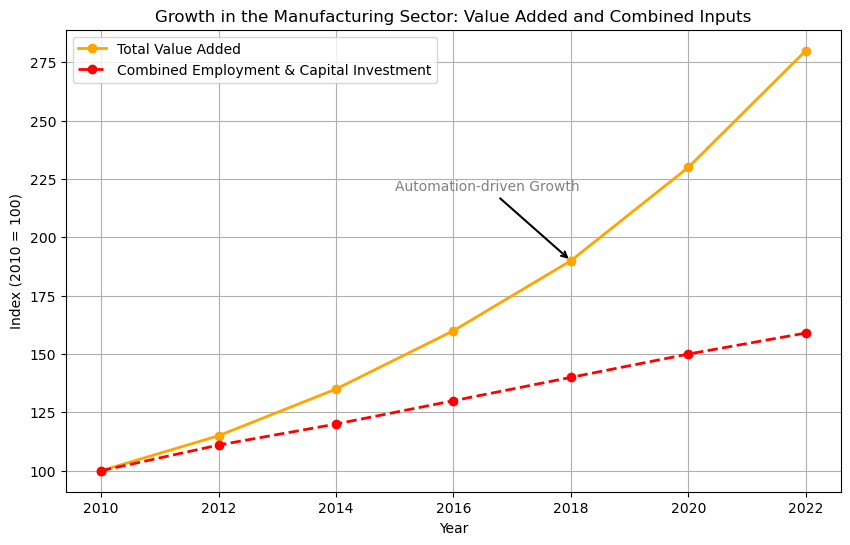

In [77]:
# Re-plotting the figure with an annotation to indicate automation-driven growth as the difference between 
# Value Added and Combined Employment & Capital lines.

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Value Added'], label='Total Value Added', marker='o', linestyle='-', linewidth=2, color='orange')
plt.plot(data['Year'], data['Combined Employment & Capital'], label='Combined Employment & Capital Investment', marker='o', linestyle='--', linewidth=2, color='red')

# Adding annotation to indicate "Automation-driven Growth" difference
plt.annotate(
    'Automation-driven Growth',
    xy=(2018, value_added[4]),  # Point on the Value Added line
    xytext=(2015, 220),  # Text position
    arrowprops=dict(facecolor='gray', arrowstyle='->', lw=1.5),
    fontsize=10,
    color='gray'
)

# Adding titles and labels
plt.title('Growth in the Manufacturing Sector: Value Added and Combined Inputs')
plt.xlabel('Year')
plt.ylabel('Index (2010 = 100)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


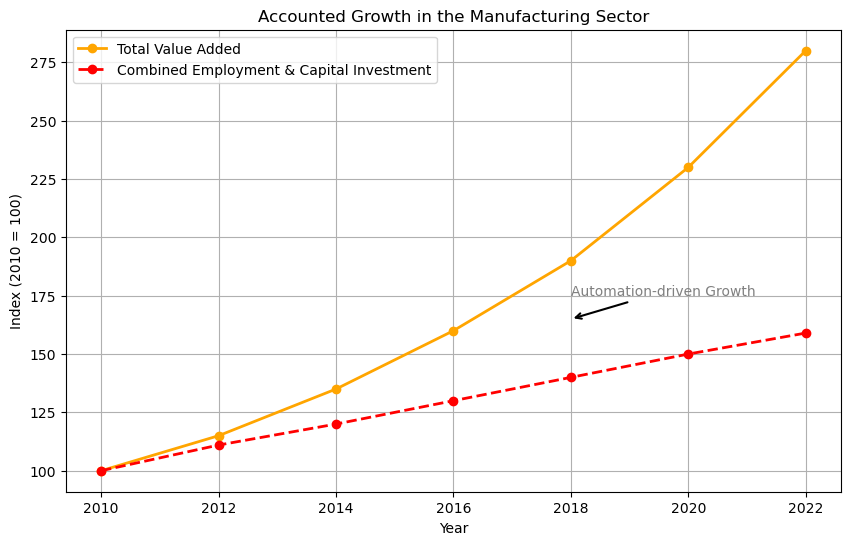

In [84]:
# Re-plotting the figure with the annotation arrow positioned between the yellow and red lines to represent automation-driven growth.

plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['Value Added'], label='Total Value Added', marker='o', linestyle='-', linewidth=2, color='orange')
plt.plot(data['Year'], data['Combined Employment & Capital'], label='Combined Employment & Capital Investment', marker='o', linestyle='--', linewidth=2, color='red')

# Adding annotation arrow between the two lines to indicate "Automation-driven Growth"
plt.annotate(
    'Automation-driven Growth',
    xy=(2018, (value_added[4] + combined_employment_capital[4]) / 2),  # Midpoint between yellow and red line for 2018
    xytext=(2018, 175),  # Position for the text
    arrowprops=dict(facecolor='gray', arrowstyle='->', lw=1.5),
    fontsize=10,
    color='gray'
)

# Adding titles and labels
plt.title('Accounted Growth in the Manufacturing Sector')
plt.xlabel('Year')
plt.ylabel('Index (2010 = 100)')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
